a) the best functional form to fit is the cosine fit

b) the average temparature is: 9.960742554948194 degrees

c) the typical daily average for the hottest time of the year is  19.921485109896388 degrees and the typical daily average for the coldest time of the year is -0.07851489010361234 degrees

d) the parameters are : [    9.96074255     6.2850291  -2583.188329       9.26567446]
9.960742554948194 is the average temperature and the value makes sense
6.285029101047487 is the
-2583.1883289991165 is the
9.265674458488043 is the


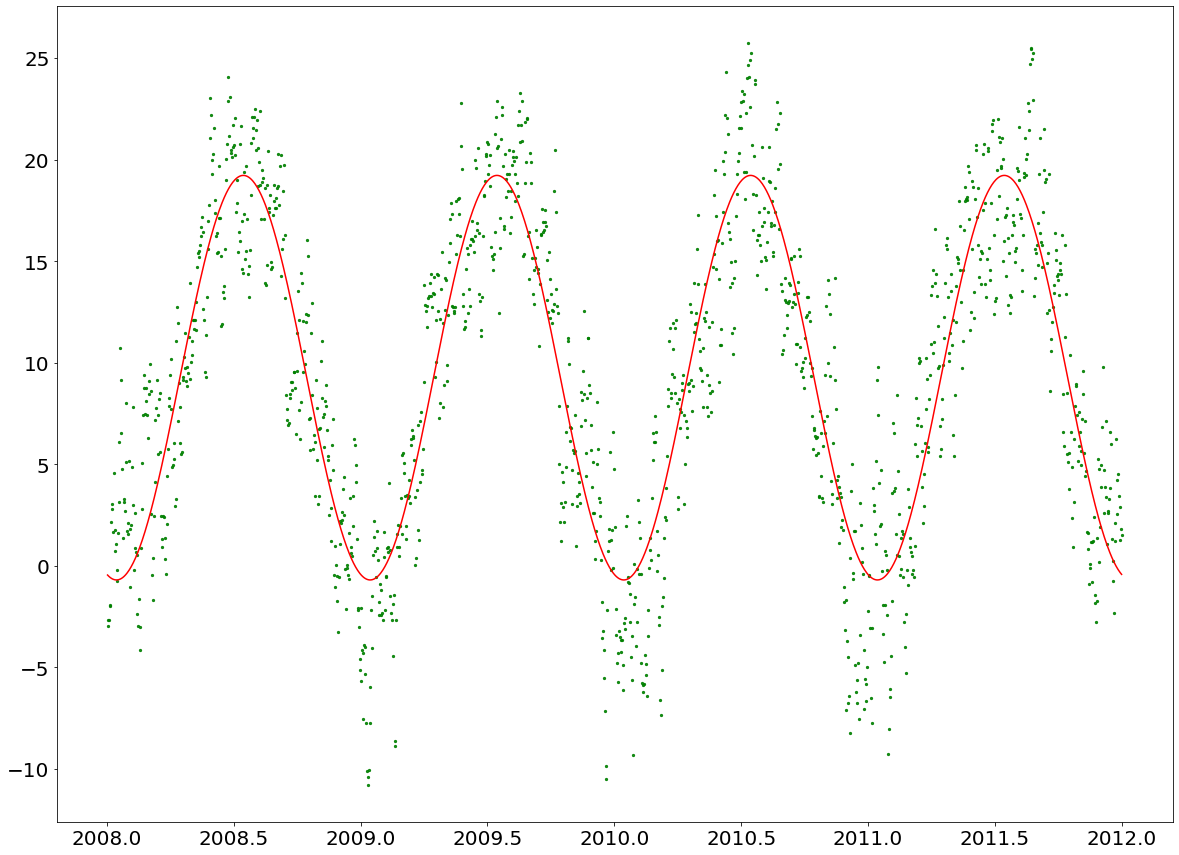

In [26]:
#Problem 1: Data Fitting 

from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits 
import scipy.optimize as opt

# POTENTIAL FITTING FUNCTIONS
def linear(x,m,b):
    return m*x+b

def poly2(x,a,b,c):
    return a*(x**2)+(b*x)+c

def poly3(x,a,b,c,d):
    return (a*(x**3))+(b*(x**2))+(c*x)+d

def exponential(x,a,b,c,d):
    return a*np.exp(b*x + c) + d

def cosfit (x,a,b,c,d):
    return a*np.cos(b*x + c) + d

def logfit(x,a,b,c,d):
    return a*np.log(b*x + c) + d

def gausian(x,mu,sigma):
    part1 = (1.0/np.sqrt(2*np.pi*sigma**2))
    return (part1*(np.exp((-1*x - mu)**2/(2*sigma**2))))

def lorentzian_cauchy (x,a,b,c):
    return (c)*(b**2/((x-a)**2 + b**2))

def sigmoid(x,a,b,c,d):
    return (c/(1 + np.exp(-b*(x-a))) + d)

# READ IN DATA FILE/
data = np.genfromtxt("munich_temperatures.txt")
Date = data[:,0]
Temp = data[:,1] 

#masking data
gd1 = (Date > 2008) & (Temp> -50) &\
    (Date < 2012) & (Temp<50)
good1 = np.where(gd1)[0]

print('a) the best functional form to fit is the cosine fit')
# PLOT TO VERIFY FILE READ I
fig1 = plt.figure(figsize=(20,15))
ax1 = fig1.add_subplot(111)
ax1.scatter(Date[good1],Temp[good1],s=5,c='g',alpha=0.9)

ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

#best fit line
popt,pcov = opt.curve_fit(cosfit,Date[gd1], Temp[gd1], p0 = [1,5,1,-5])
ax1.plot(Date[gd1],cosfit(Date[gd1],*popt), c='r')

print(                     '')
print('b) the average temparature is:', popt[0],'degrees')
warmest = popt[0]*2
coldest = 0-(20-warmest)
print(                     '')
print('c) the typical daily average for the hottest time of the year is ' ,warmest ,'degrees',\
      'and the typical daily average for the coldest time of the year is', coldest, 'degrees')
print(                     '')
print('d) the parameters are :', popt)
print( popt[0],'is the average temperature and the value makes sense')
print( popt[1],'is the')
print( popt[2],'is the')
print( popt[3],'is the')


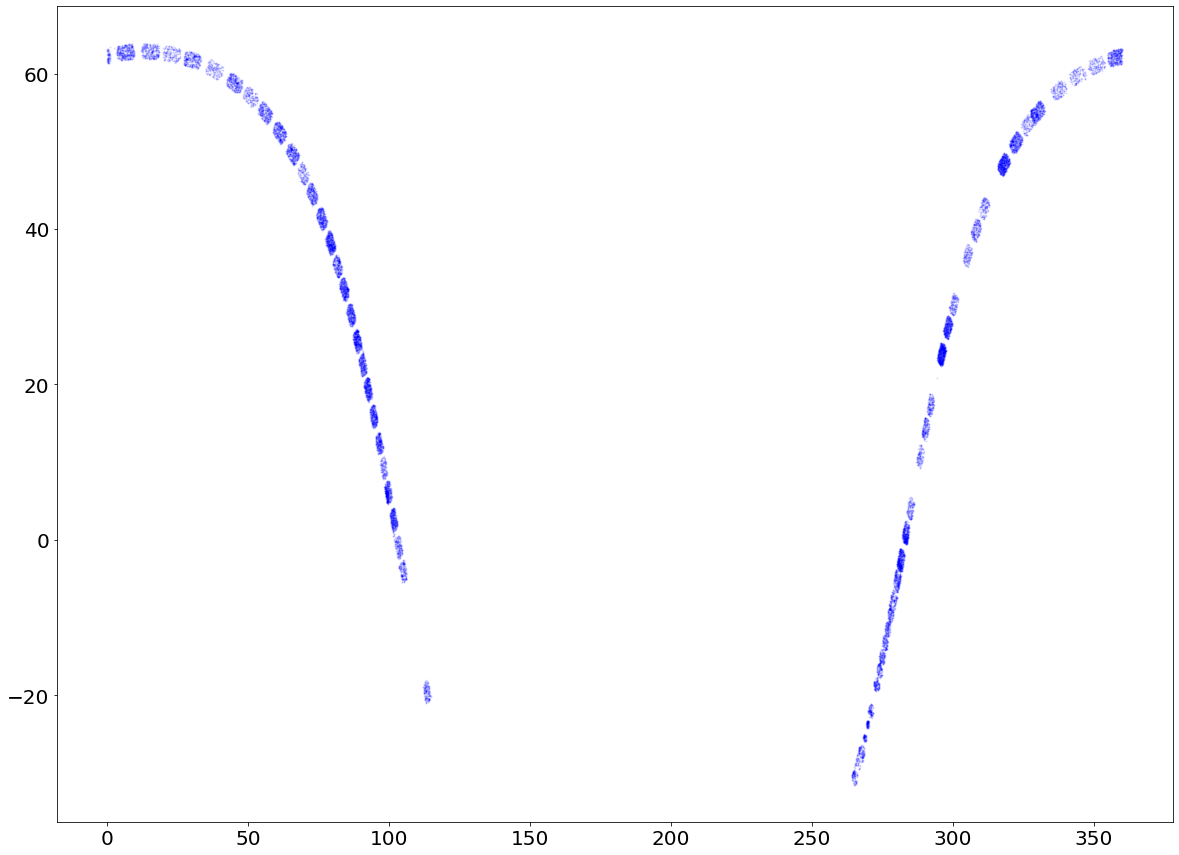

In [3]:
from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits 
import scipy.optimize as opt

# POTENTIAL FITTING FUNCTIONS
def linear(x,m,b):
    return m*x+b

def poly2(x,a,b,c):
    return a*(x**2)+(b*x)+c

def poly3(x,a,b,c,d):
    return (a*(x**3))+(b*(x**2))+(c*x)+d

def exponential(x,a,b,c,d):
    return a*np.exp(b*x + c) + d

def cosfit (x,a,b,c,d):
    return a*np.cos(b*x + c) + d

def logfit(x,a,b,c,d):
    return a*np.log(b*x + c) + d

def gausian(x,mu,sigma):
    part1 = (1.0/np.sqrt(2*np.pi*sigma**2))
    return (part1*(np.exp((-1*x - mu)**2/(2*sigma**2))))

def lorentzian_cauchy (x,a,b,c):
    return (c)*(b**2/((x-a)**2 + b**2))

def sigmoid(x,a,b,c,d):
    return (c/(1 + np.exp(-b*(x-a))) + d)

# READ IN FITS FILES
star_hdus = fits.open('allStar-l31c.2.fits')
star = star_hdus[1].data
#print(star_hdus[1].columns)
star_hdus.close()

# TWO BITWISE FLAGS FOR BAD DATA             
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

# Make a Boolena Mask to remove bad data
gd = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
     (star['GLAT']> -1) & (star['GLAT']< 1) &\
     (star['TEFF'] > 2500) & (star['LOGG'] > -9999)
good = np.where(gd)[0]


# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(star['ra'][good],star['DEC'][good],s=1,c='b',alpha=0.1)
#ax.scatter(star['GLON'][good],star['GLAT'][good],s=1,c='r',alpha=0.1)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.show()

Part a


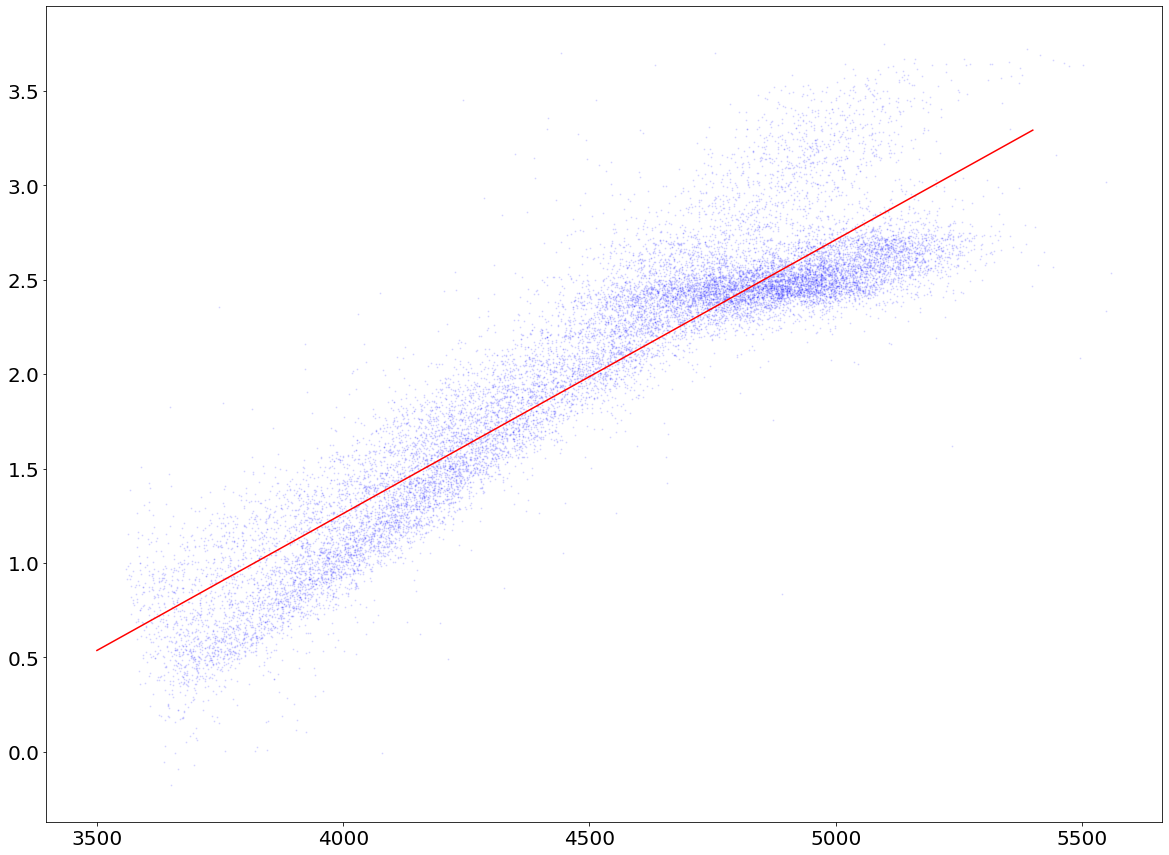

In [4]:
print ('Part a')
# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(star['TEFF'][good],star['LOGG'][good],s=1,c='b',alpha=0.1)


ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)


# LINEAR MC FIT
def mcFitLine(x, y, x_err, y_err):
    slopes = list()
    y_ints = list()
    iters = 500
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightx = np.random.randn(len(x))
        weighty = np.random.randn(len(y))
        
        x_adj = x + x_err*weightx 
        y_adj = y + y_err*weighty

        params, cov = opt.curve_fit(linear, x_adj, y_adj)
        slopes.append(params[0])
        y_ints.append(params[1])
        
    return [np.mean(slopes), np.mean(y_ints)], [np.std(slopes), np.std(y_ints)]

popt,pcov = mcFitLine(star['TEFF'][good], star['LOGG'][good], star['TEFF_ERR'][good], star['LOGG_ERR'][good])

xplot = np.arange(3500,5500,100)
ax.plot(xplot,linear(xplot,popt[0],popt[1]), c='r')

plt.show()

Part b


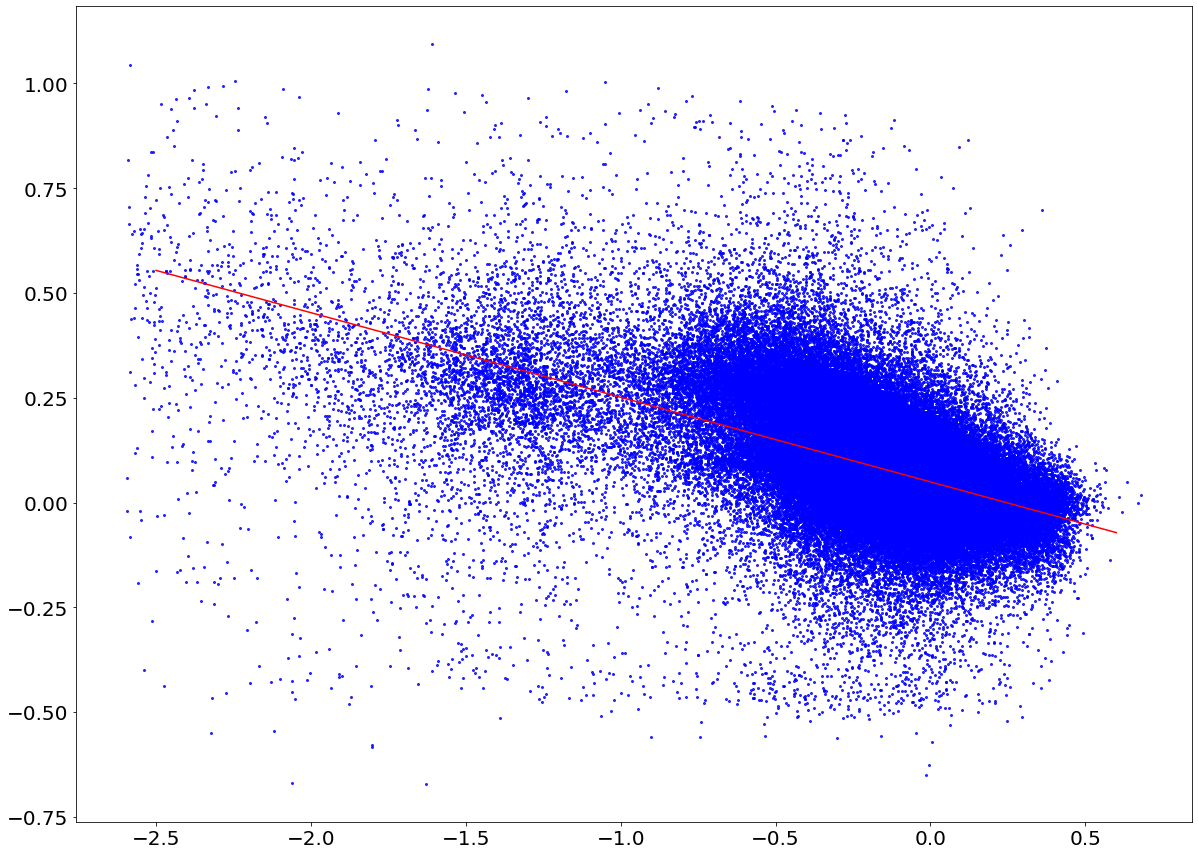

In [45]:
print ('Part b')
# READ IN FITS FILES
star_hdus = fits.open('allStar-l31c.2.fits')
star = star_hdus[1].data
#print(star_hdus[1].columns)
star_hdus.close()

# TWO BITWISE FLAGS FOR BAD DATA             
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

gd1 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
     ((star['GLAT']< -10) | (star['GLAT']> 10)) &\
     (star['FE_H'] > -9999) & (star['FE_H'] < 9999) &\
     (star['O_FE'] < 9999) & (star['O_FE'] > - 9999) 

good1 = np.where(gd1)[0]

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(star['FE_H'][good1],star['O_FE'][good1],s=4,c='b',alpha=0.8)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

# LINEAR MC FIT
def mcFitLine(x, y, x_err, y_err):
    slopes = list()
    y_ints = list()
    iters = 500
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightx = np.random.randn(len(x))
        weighty = np.random.randn(len(y))
        
        x_adj = x + x_err*weightx 
        y_adj = y + y_err*weighty

        params, cov = opt.curve_fit(linear, x_adj, y_adj)
        slopes.append(params[0])
        y_ints.append(params[1])
        
    return [np.mean(slopes), np.mean(y_ints)], [np.std(slopes), np.std(y_ints)]

popt,pcov = mcFitLine(star['FE_H'][good1], star['O_FE'][good1], star['FE_H_ERR'][good1], star['O_FE_ERR'][good1])

xplot1 = np.arange(-2.5,0.7,0.1)
ax.plot(xplot1,linear(xplot1,popt[0],popt[1]), c='r')

plt.show()

Part c


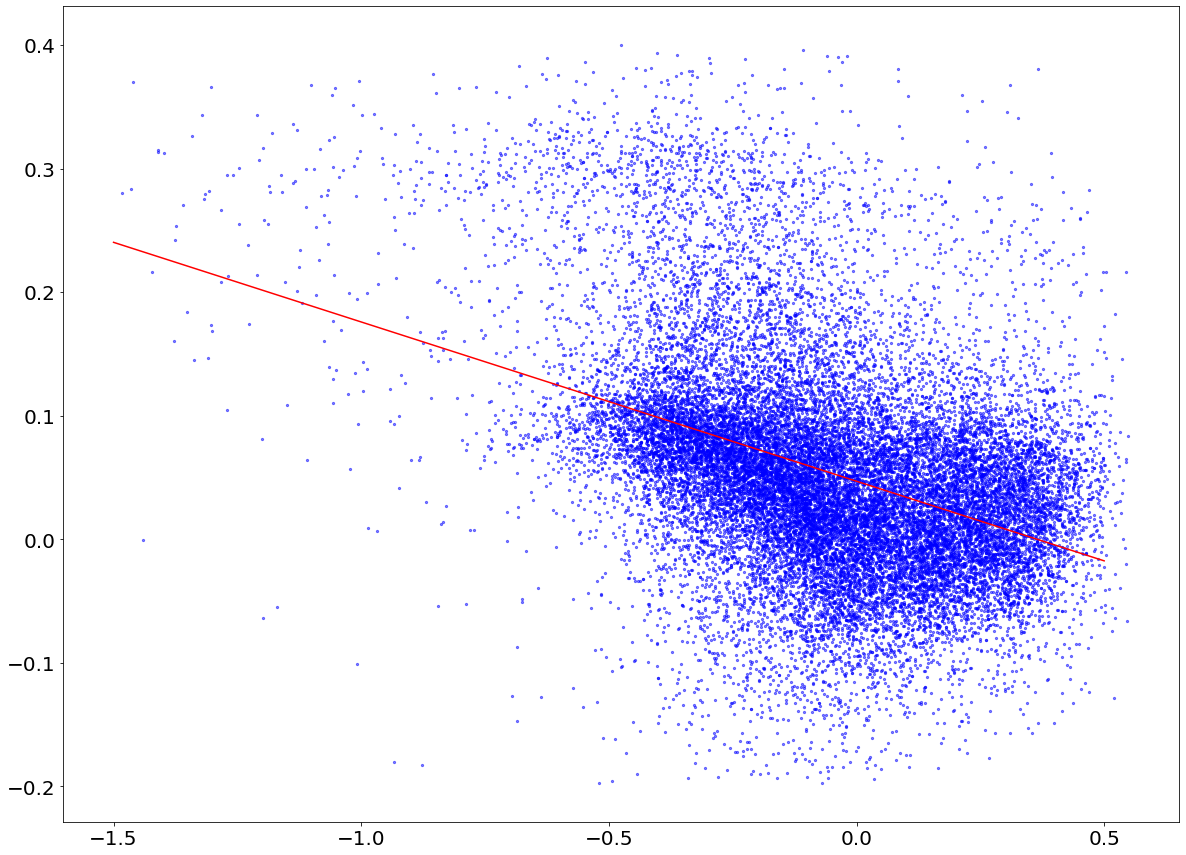

In [44]:
print ('Part c')
# READ IN FITS FILES
star_hdus = fits.open('allStar-l31c.2.fits')
star = star_hdus[1].data
#print(star_hdus[1].columns)
star_hdus.close()

# TWO BITWISE FLAGS FOR BAD DATA             
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

gd2 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
     ((star['GLAT']> -2) & (star['GLAT']< 2)) &\
     (star['FE_H'] > -1.5) & (star['FE_H'] < 0.55) &\
     (star['O_FE'] < 0.4) & (star['O_FE'] > - 0.2) 

good2 = np.where(gd2)[0]

fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(111)
ax1.scatter(star['FE_H'][good2],star['O_FE'][good2],s=5,c='b',alpha=0.5)

ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

# LINEAR MC FIT
def mcFitLine(x, y, x_err, y_err):
    slopes = list()
    y_ints = list()
    iters = 500
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightx = np.random.randn(len(x))
        weighty = np.random.randn(len(y))
        
        x_adj = x + x_err*weightx 
        y_adj = y + y_err*weighty

        params, cov = opt.curve_fit(linear, x_adj, y_adj)
        slopes.append(params[0])
        y_ints.append(params[1])
        
    return [np.mean(slopes), np.mean(y_ints)], [np.std(slopes), np.std(y_ints)]

popt,pcov = mcFitLine(star['FE_H'][good2], star['O_FE'][good2], star['FE_H_ERR'][good2], star['O_FE_ERR'][good2])

xplot1 = np.arange(-1.5,0.7,0.5)
ax1.plot(xplot1,linear(xplot1,popt[0],popt[1]), c='r')

plt.show()

Part d


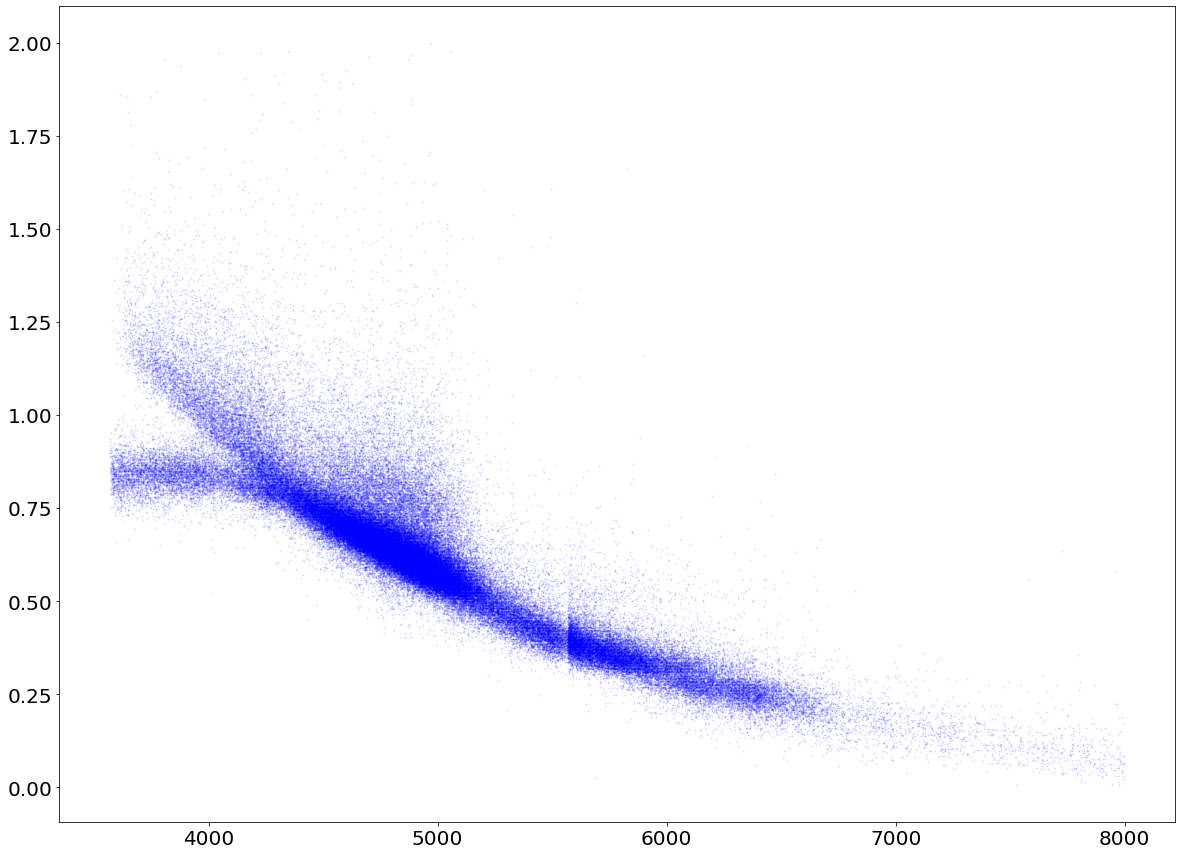

In [59]:
print ('Part d')
# READ IN FITS FILES
star_hdus = fits.open('allStar-l31c.2.fits')
star = star_hdus[1].data
#print(star_hdus[1].columns)
star_hdus.close()

starjk = star['J']-star['K']
jk_err = np.sqrt((star['J_ERR']**2) +(star['K_ERR']**2))

# TWO BITWISE FLAGS FOR BAD DATA             
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

gd3 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
     ((star['GLAT']< -10) | (star['GLAT']> 10)) &\
     (star['TEFF'] > 2500) & (star['TEFF'] < 8000) &\
     (starjk <2) & (starjk > 0) 

good3 = np.where(gd3)[0]

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(star['TEFF'][good3],starjk[good3],s=1,c='b',alpha=0.1)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

Part e


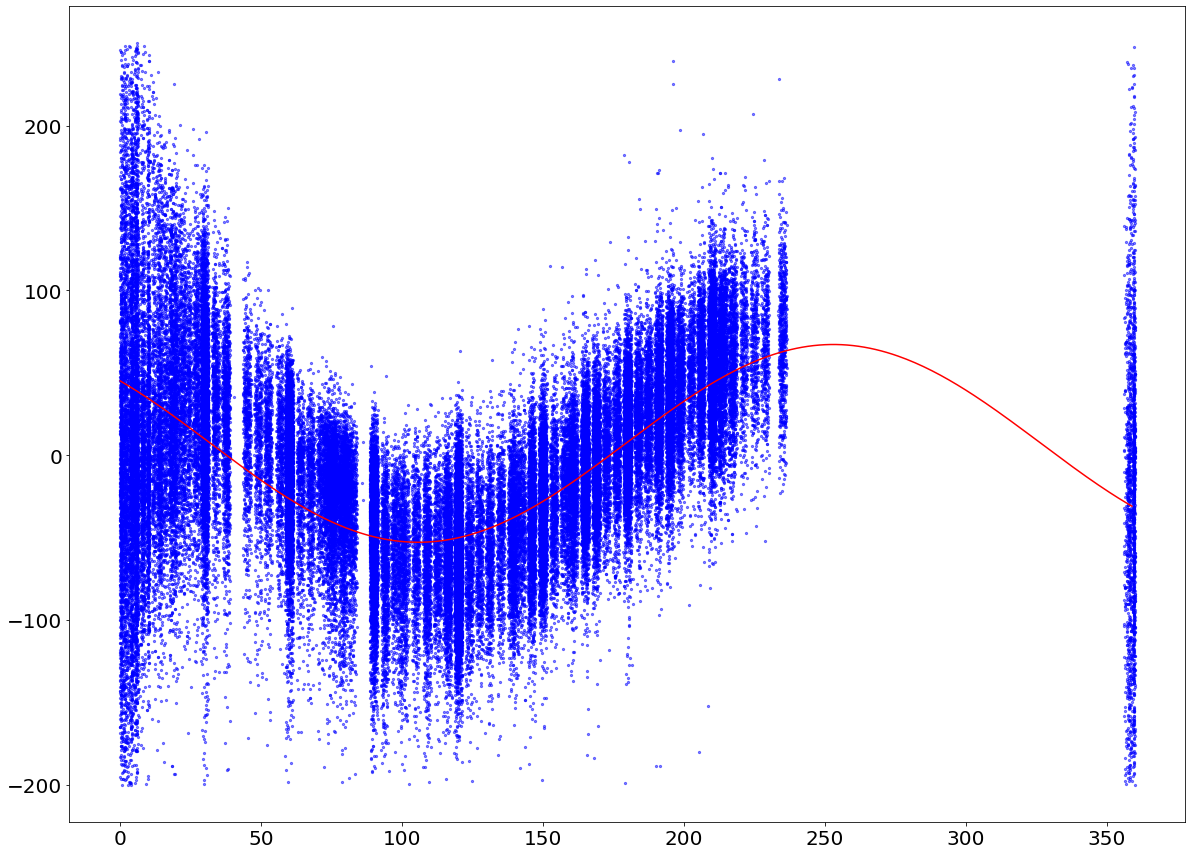

In [43]:
print ('Part e')
# READ IN FITS FILES
star_hdus = fits.open('allStar-l31c.2.fits')
star = star_hdus[1].data
#print(star_hdus[1].columns)
star_hdus.close()

# TWO BITWISE FLAGS FOR BAD DATA             
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

gd4 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
     ((star['GLAT']< 10) & (star['GLAT']> -10)) &\
     (star['GLON'] > 0) & (star['GLON'] < 360) &\
     (star['VHELIO_AVG'] < 250) & (star['VHELIO_AVG'] > -200) 

good4 = np.where(gd4)[0]

fig = plt.figure(figsize=(20,15))
ax4 = fig.add_subplot(111)
ax4.scatter(star['GLON'][good4],star['VHELIO_AVG'][good4],s=5,c='b',alpha=0.5)

ax4.xaxis.set_tick_params(labelsize=20)
ax4.yaxis.set_tick_params(labelsize=20)

#best fit line
xcosplt = np.arange(0,360,1)
popt,pcov = opt.curve_fit(cosfit,star['GLON'][gd4], star['VHELIO_AVG'][gd4], p0 = [100,np.pi/180,1,5])
ax4.plot(xcosplt,cosfit(xcosplt,*popt), c='r')


Part f


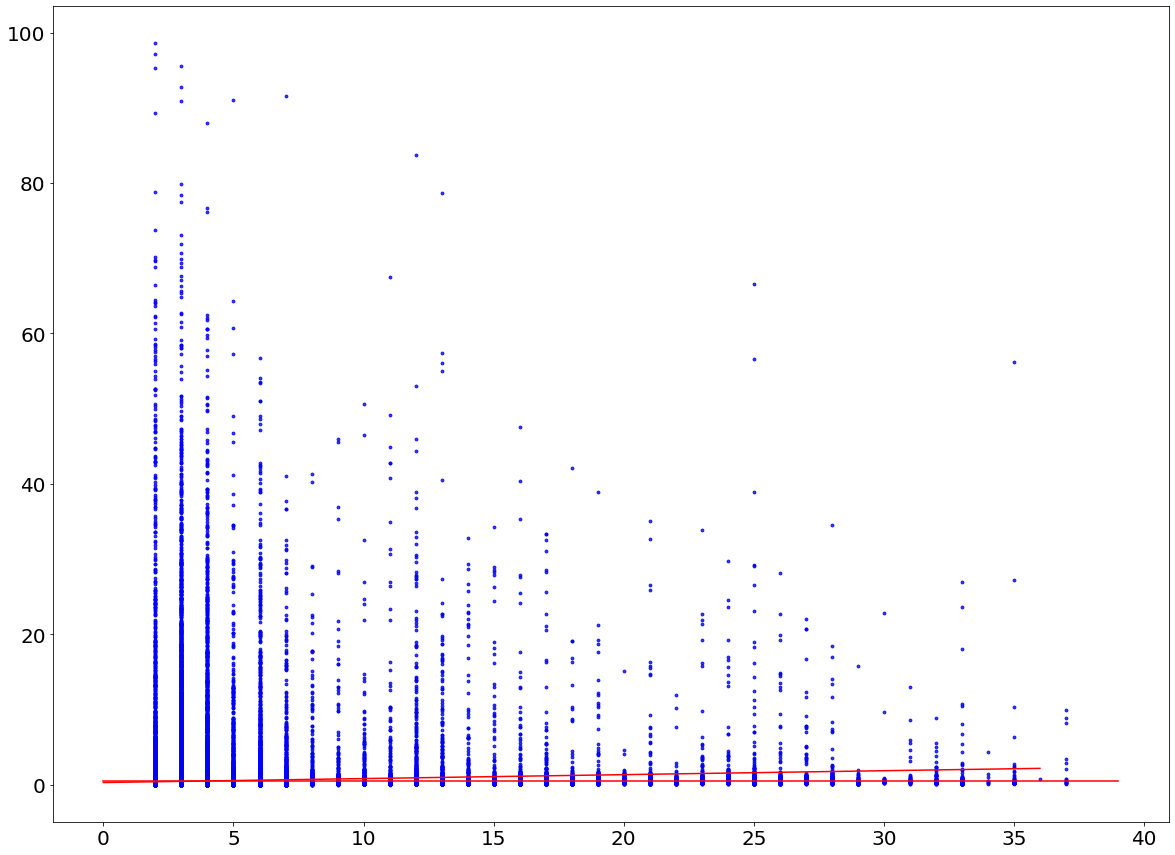

In [54]:
print ('Part f')
# READ IN FITS FILES
star_hdus = fits.open('allStar-l31c.2.fits')
star = star_hdus[1].data
#print(star_hdus[1].columns)
star_hdus.close()

# TWO BITWISE FLAGS FOR BAD DATA             
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

gd5 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
     (star['NVISITS'] > 0) & (star['NVISITS'] < 40) &\
     (star['VSCATTER'] < 100) & (star['VSCATTER'] >0) 

good5 = np.where(gd5)[0]

fig = plt.figure(figsize=(20,15))
ax5 = fig.add_subplot(111)
ax5.scatter(star['NVISITS'][good5],star['VSCATTER'][good5],s=8,c='b',alpha=0.8)

ax5.xaxis.set_tick_params(labelsize=20)
ax5.yaxis.set_tick_params(labelsize=20)

#best fit line
xexpplt = np.arange(0,40,1)
popt,pcov = opt.curve_fit(exponential,star['NVISITS'][gd5], star['VSCATTER'][gd5], p0 = [5,-1,0,1])
ax5.plot(xexpplt,exponential(xexpplt,*popt), c='r')

# LINEAR MC FIT
def mcFitLine(x, y, x_err, y_err):
    slopes = list()
    y_ints = list()
    iters = 500
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightx = np.random.randn(len(x))
        weighty = np.random.randn(len(y))
        
        x_adj = x + x_err*weightx 
        y_adj = y + y_err*weighty

        params, cov = opt.curve_fit(linear, x_adj, y_adj)
        slopes.append(params[0])
        y_ints.append(params[1])
        
    return [np.mean(slopes), np.mean(y_ints)], [np.std(slopes), np.std(y_ints)]

popt,pcov = mcFitLine(star['NVISITS'][gd5], star['VSCATTER'][gd5], 0.0, star['VERR'][good5])

xplot2 = np.arange(0,37,1)
ax5.plot(xplot2,linear(xplot2,popt[0],popt[1]), c='r')

plt.show()